In [3]:
import os
from typing import Dict, List, Tuple
import torch
from torch import Tensor, nn

import detectron2.data.transforms as T
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2.data import build_detection_test_loader, detection_utils
from detectron2.evaluation import COCOEvaluator, inference_on_dataset, print_csv_format
from detectron2.export import (
    Caffe2Tracer,
    TracingAdapter,
    add_export_config,
    dump_torchscript_IR,
    scripting_with_instances,
)
from detectron2.modeling import GeneralizedRCNN, RetinaNet, build_model
from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.projects.point_rend import add_pointrend_config
from detectron2.structures import Boxes
from detectron2.utils.env import TORCH_VERSION
from detectron2.utils.file_io import PathManager
from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultPredictor

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Model name
model_name = 'mymodel_after' #'model_final'
path_string = '/home/vai_voxelsafety_com/models/detectron/50_epoch'

In [163]:
import detectron2 
from detectron2.config import get_cfg
from detectron2 import model_zoo

model_path = f'{path_string}/{model_name}.pth'
# model_path = '/home/vai_voxelsafety_com/models/detectron/50_epoch/model_final.pth'

classes = ["PERSON", "PIT", "HARDHAT", "SAFETY_VEST"]
cfg_l = get_cfg()
cfg_l.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml'))
cfg_l.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # Set threshold for this model
cfg_l.MODEL.WEIGHTS = model_name # Set path model .pth
cfg_l.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
cfg_l.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32], [32, 64], [64, 128], [128, 256], [256, 512]]
cfg_l.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0]]

print(cfg_l.INPUT.FORMAT)
print(cfg_l.INPUT.MIN_SIZE_TEST)
print(cfg_l.INPUT.MAX_SIZE_TEST)

from torch import Tensor, nn
from detectron2.export import dump_torchscript_IR, scripting_with_instances
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.modeling import build_model

# my_model = build_model(cfg_l)  # returns a torch.nn.Module
# DetectionCheckpointer(my_model).load(model_path)

BGR
800
1333


In [2]:
import detectron2 
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = '/home/vai_voxelsafety_com/models/detectron/50_epoch/mymodel_after.pth'
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

predictor = DefaultPredictor(cfg)

In [123]:
predictor.model
my_model = predictor.model
my_model.eval()

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

(75, 53, 3)


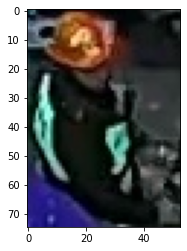

In [124]:
IMAGE_PATH = '/home/vai_voxelsafety_com/models/detectron/frame_12327.jpg'
IMAGE_PATH = '/data/detectron2/scenario_test/hardhat/hat/uscold_laredo_doors_14_20_cha_scenarios_HARD_HAT_negative_55106_frame_9_119880.jpg'
import cv2
img = cv2.imread(IMAGE_PATH)
plt.imshow(img)
print(img.shape)

In [125]:
predictor(img)

{'instances': Instances(num_instances=25, image_height=75, image_width=53, fields=[pred_boxes: Boxes(tensor([[ 6.7899,  0.4226, 30.3745, 19.7280],
         [10.2583,  0.5939, 40.7296, 25.6498],
         [ 0.0000, 20.8520, 52.5546, 60.1418],
         [ 5.7560, 11.2629, 43.6557, 52.9027],
         [ 7.8910, 21.0898, 51.0369, 45.3532],
         [ 1.6450, 13.8699, 53.0000, 35.8720],
         [ 4.6417,  3.4602, 49.3137, 38.5858],
         [19.4773,  0.5001, 38.2359, 18.5181],
         [ 5.1256, 10.9844, 44.7616, 50.0531],
         [26.0365, 16.2682, 52.3365, 59.5408],
         [ 0.6551,  2.2100, 27.3408, 37.5274],
         [ 4.9574, 24.9950, 50.6564, 63.1086],
         [ 0.0000,  0.0000, 15.1170, 19.2943],
         [ 8.3794, 21.6003, 53.0000, 43.6044],
         [ 3.3399,  0.0967, 21.5809, 16.3922],
         [ 0.4804, 17.0607, 27.8800, 58.5158],
         [ 9.3003,  0.7345, 26.1741, 13.8179],
         [21.4468, 32.9613, 53.0000, 67.6080],
         [17.4499,  8.8157, 49.6583, 41.0858],
       

In [126]:
def export_tracing(torch_model, inputs):
    assert TORCH_VERSION >= (1, 8)
    image = inputs[0]["image"]
    inputs = [{"image": image}]  # remove other unused keys

    if isinstance(torch_model, GeneralizedRCNN):

        def inference(model, inputs):
            # use do_postprocess=False so it returns ROI mask
            inst = model.inference(inputs, do_postprocess=False)[0]
            return [{"instances": inst}]

    else:
        inference = None  # assume that we just call the model directly

    traceable_model = TracingAdapter(torch_model, inputs, inference)

    ts_model = torch.jit.trace(traceable_model, (image,))
    print(f"Type before writing: {type(ts_model)}")
    
    print(os.path.join(path_string, f"{model_name}.ts"))
    with PathManager.open(os.path.join(path_string, f"{model_name}.ts"), "wb") as f:
        torch.jit.save(ts_model, f)
    dump_torchscript_IR(ts_model, path_string)
    print("Inputs schema: " + str(traceable_model.inputs_schema))
    print("Outputs schema: " + str(traceable_model.outputs_schema))

    if not isinstance(torch_model, (GeneralizedRCNN, RetinaNet)):
        return None

    def eval_wrapper(inputs):
        """
        The exported model does not contain the final resize step, which is typically
        unused in deployment but needed for evaluation. We add it manually here.
        """
        input = inputs[0]
        instances = traceable_model.outputs_schema(ts_model(input["image"]))[0]["instances"]
        postprocessed = detector_postprocess(instances, input["height"], input["width"])
        return [{"instances": postprocessed}]

    return eval_wrapper

In [127]:
height, width = img.shape[:2]
image = torch.as_tensor(img.astype("float32").transpose(2, 0, 1))
sample_inputs = [{"image": image, "height": height, "width": width}]

In [128]:
# print(my_model)
my_model = predictor.model
my_model.eval()

image = image.unsqueeze(0)
print(image.shape)

example_input = torch.randn(3, 256, 256, requires_grad=False).cpu()
sample_inputs = [{"image": example_input, "height": 256, "width": 256}]

print("Before: ", my_model(sample_inputs))

# exported_model = torch.jit.trace(my_model, example_input)
exported_model = export_tracing(my_model, sample_inputs)
print("After Export: ", exported_model(sample_inputs))
# print(exported_model)


with PathManager.open(os.path.join(path_string, f"{model_name}.ts"), "rb") as f:
    loaded_model = torch.jit.load(f)
print(sample_inputs)
print("After loading: ", loaded_model(example_input))

torch.Size([1, 3, 75, 53])
Before:  [{'instances': Instances(num_instances=0, image_height=256, image_width=256, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4), grad_fn=<ViewBackward>)), scores: tensor([], device='cuda:0', grad_fn=<IndexBackward>), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}]
Type before writing: <class 'torch.jit._trace.TopLevelTracedModule'>
/home/vai_voxelsafety_com/models/detectron/50_epoch/mymodel_after.ts
Inputs schema: TupleSchema(schemas=[ListSchema(schemas=[DictSchema(schemas=[IdentitySchema()], sizes=[1], keys=['image'])], sizes=[1])], sizes=[1])
Outputs schema: ListSchema(schemas=[DictSchema(schemas=[InstancesSchema(schemas=[TensorWrapSchema(class_name='detectron2.structures.Boxes'), IdentitySchema(), IdentitySchema()], sizes=[1, 1, 1], keys=['pred_boxes', 'pred_classes', 'scores'])], sizes=[4], keys=['instances'])], sizes=[4])
After Export:  [{'instances': Instances(num_instances=0, image_height=256, image_width=256, f

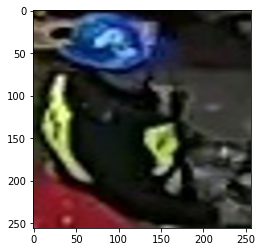

In [159]:
from PIL import Image
from torchvision.transforms import ToTensor, Lambda

type(img)
test_image = Image.open(IMAGE_PATH)
type(test_image)

t = ToTensor()

test_image = test_image.resize((256,256))
plt.imshow(test_image)

test_tensor = t(test_image)
test_np = np.asarray(test_image)

In [160]:
# test_tensor_u = test_tensor.unsqueeze(0)
# print(test_tensor_u.shape)
print(test_tensor.shape)
_,height,width = test_tensor.shape
test_inputs = [{"image": test_tensor*255, "height": height, "width": width}]
print("Before: ", my_model(test_inputs))
print("Loaded: ", loaded_model(test_tensor*255))
print("Detetron: ", predictor(test_np))

# my_model(img)

torch.Size([3, 256, 256])
Before:  [{'instances': Instances(num_instances=2, image_height=256, image_width=256, fields=[pred_boxes: Boxes(tensor([[ 24.0159,   3.7408, 167.0251,  87.8425],
        [ 33.2281,   4.0160, 199.3878, 140.6443]], device='cuda:0',
       grad_fn=<IndexBackward>)), scores: tensor([0.1580, 0.0861], device='cuda:0', grad_fn=<IndexBackward>), pred_classes: tensor([3, 3], device='cuda:0')])}]
Loaded:  (tensor([[ 24.0159,   3.7408, 167.0251,  87.8425],
        [ 33.2281,   4.0160, 199.3878, 140.6444]], device='cuda:0',
       grad_fn=<ViewBackward>), tensor([3, 3], device='cuda:0'), tensor([0.1580, 0.0861], device='cuda:0', grad_fn=<IndexBackward>), tensor([256, 256]))
Detetron:  {'instances': Instances(num_instances=16, image_height=256, image_width=256, fields=[pred_boxes: Boxes(tensor([[ 50.5451,   3.0619, 138.8576,  67.1583],
        [ 27.2888,   7.0640, 202.4824, 181.0696],
        [  0.8205,   1.0660,  68.1984,  56.6067],
        [ 37.7052,   0.0000, 222.6507, 

In [74]:
image = img
original_image = img
m = exported_model

with torch.no_grad():  # https://github.com/sphinx-doc/sphinx/issues/4258
    # Apply pre-processing to image.
#     height, width = original_image.shape[:2]
    height, width = image.shape[:2]
#     image = aug.get_transform(original_image).apply_image(original_image)
    image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))

    inputs = {"image": image, "height": height, "width": width}
    predictions = m([inputs])
    print(predictions)
#     return predictions

[{'instances': Instances(num_instances=1, image_height=75, image_width=53, fields=[pred_boxes: Boxes(tensor([[ 1.3695,  2.6284, 51.9329, 68.8776]], device='cuda:0')), pred_classes: tensor([3], device='cuda:0'), scores: tensor([0.0560], device='cuda:0')])}]


In [151]:
p = predictor(img)
print(p)

{'instances': Instances(num_instances=25, image_height=75, image_width=53, fields=[pred_boxes: Boxes(tensor([[ 6.7899,  0.4226, 30.3745, 19.7280],
        [10.2583,  0.5939, 40.7296, 25.6498],
        [ 0.0000, 20.8520, 52.5546, 60.1418],
        [ 5.7560, 11.2629, 43.6557, 52.9027],
        [ 7.8910, 21.0898, 51.0369, 45.3532],
        [ 1.6450, 13.8699, 53.0000, 35.8720],
        [ 4.6417,  3.4602, 49.3137, 38.5858],
        [19.4773,  0.5001, 38.2359, 18.5181],
        [ 5.1256, 10.9844, 44.7616, 50.0531],
        [26.0365, 16.2682, 52.3365, 59.5408],
        [ 0.6551,  2.2100, 27.3408, 37.5274],
        [ 4.9574, 24.9950, 50.6564, 63.1086],
        [ 0.0000,  0.0000, 15.1170, 19.2943],
        [ 8.3794, 21.6003, 53.0000, 43.6044],
        [ 3.3399,  0.0967, 21.5809, 16.3922],
        [ 0.4804, 17.0607, 27.8800, 58.5158],
        [ 9.3003,  0.7345, 26.1741, 13.8179],
        [21.4468, 32.9613, 53.0000, 67.6080],
        [17.4499,  8.8157, 49.6583, 41.0858],
        [ 8.7290,  7.9825

In [13]:
b_pth = p['instances'].pred_boxes.tensor.cpu().numpy()
b_ts = predictions[0]['instances'].pred_boxes.tensor.cpu().numpy()
print(b_ts)

[[ 1.3695278  2.628395  51.93289   68.87764  ]]


In [23]:
def input_to_image_rectangle(in_put, predict,):
        o = in_put
        im = in_put.copy()
        for i in range(predict.shape[0]):
#             if i > 2:
#                 break
            print(int(predict[i,0]), int(predict[i,1]), int(predict[i,2]), int(predict[i,3]))
            cv2.rectangle(im, (int(predict[i,0]), int(predict[i,1])), (int(predict[i,2]), int(predict[i,3])), (255, 0, 0), 2)
        plt.imshow(im.astype(np.uint8))

1 2 51 68


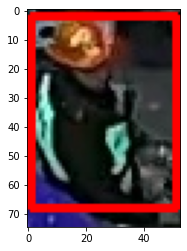

In [141]:
input_to_image_rectangle(img, b_ts)

6 0 30 19
10 0 40 25
0 20 52 60
5 11 43 52
7 21 51 45
1 13 52 35
4 3 49 38
19 0 38 18
5 10 44 50
26 16 52 59
0 2 27 37
4 24 50 63
0 0 15 19
8 21 52 43
3 0 21 16
0 17 27 58
9 0 26 13
21 32 52 67
17 8 49 41
8 7 31 28
25 17 51 58
2 10 40 59
0 16 24 59
2 10 40 59
0 4 23 23


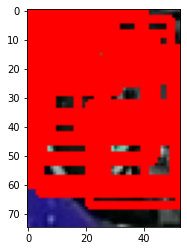

In [25]:
input_to_image_rectangle(img, b_pth)